# Pandas

In [194]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
from IPython.display import Image, HTML

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:  
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [115]:
HTML('<iframe src=http://pandas.pydata.org/index.html width=1000 height=350></iframe>')

The conventional way to import pandas is: 

```python
import pandas as pd
```

In [116]:
import pandas as pd

In [117]:
print(pd.__version__)

0.20.1


In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

some options setting 

In [119]:
pd.set_option("display.width", 80)
# toggle the line below that if one doesnt want DataFrames displayed as HTML tables
#pd.set_option("notebook_repr_html", False) 
pd.set_option("notebook_repr_html", True) 

Pandas's data structures and functionalities will be familiar to R users, there's a section on Pandas's website where 
Wes McKinney gives some translation of common idioms / operations between R and Pandas 

In [122]:
HTML('<iframe src=http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html#compare-with-r width=1000 height=350></iframe>')

## Pandas data structures

### Series


A **Series** is a single vector of data values (think a NumPy array with shape N or (N,1)) with an **index** that labels each element in the vector.

#### Series constructions

In [133]:
np.random.seed(42)

In [134]:
x = np.random.normal(0,1,(10,))

In [135]:
x.shape

(10,)

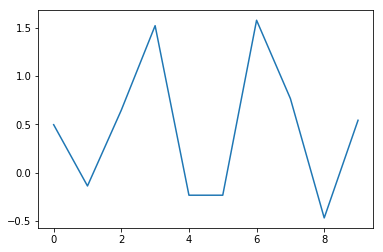

In [136]:
plt.plot(x)

In [137]:
a = pd.Series(x)

In [138]:
a

0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
5   -0.234137
6    1.579213
7    0.767435
8   -0.469474
9    0.542560
dtype: float64

In [139]:
a.index

RangeIndex(start=0, stop=10, step=1)

In [140]:
a.values

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

#### You can define your own **index**

In [141]:
a = pd.Series(x, index=np.arange(1,11))

In [142]:
a

1     0.496714
2    -0.138264
3     0.647689
4     1.523030
5    -0.234153
6    -0.234137
7     1.579213
8     0.767435
9    -0.469474
10    0.542560
dtype: float64

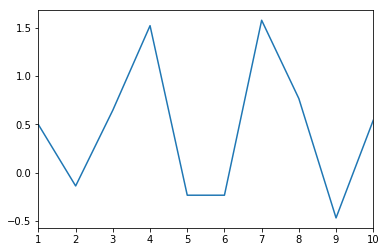

In [143]:
a.plot()

In [144]:
a = pd.Series(np.random.normal(0,1,(5,)), index=['a','b','c','d','e'], name='my series')

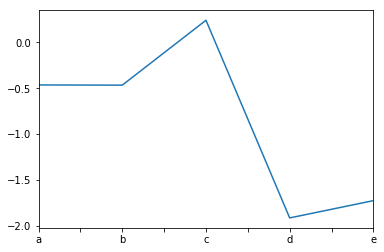

In [145]:
a.plot()

Pandas objects expose some powerful, **high level plotting functions** (built on top of Matplotlib)

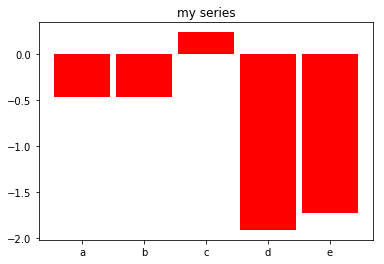

In [146]:
a.plot(kind='bar', rot=0, color='r', title=a.name, width=0.9)

same plot in matplotlib

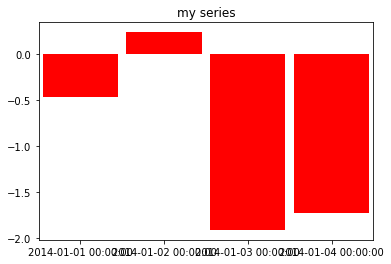

In [173]:
f, ax = plt.subplots()
bars = ax.bar(np.arange(len(a)), a.values, color='r', align='center', width=0.9)
ax.set_xticks(np.arange(len(a)))
ax.set_xlim(-0.5, len(a)-0.5)
ax.set_xticklabels(a.index)
ax.set_title(a.name)

#### Series indexing

Selecting from a Series is easy, using the corresponding index key (like a dict)

In [149]:
a

a   -0.463418
b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [150]:
a['c']

0.24196227156603412

slices are permitted 

In [151]:
a['a':'c'] ### Note the difference with standard Python / Numpy positional, integer indexing

a   -0.463418
b   -0.465730
c    0.241962
Name: my series, dtype: float64

In [152]:
a['c':]

c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

deleting an element 

In [153]:
a

a   -0.463418
b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [154]:
a.drop('d')

a   -0.463418
b   -0.465730
c    0.241962
e   -1.724918
Name: my series, dtype: float64

Adding an element is (to my knowledge) not straightforward

In [155]:
a.drop('a', inplace=True)

In [156]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [157]:
a.append(pd.Series({'a':5}))

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
a    5.000000
dtype: float64

In [158]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

Mathematical operations involving two series will perform operations by *aligning indices*.

1. The union of all indices is created
2. The mathematical operation is performed on matching indices. 

Indices that do not match are given the value NaN (not a number), and values are computed for all unique pairs of repeated indices.

In [159]:
s1 = pd.Series(np.arange(1.0,4.0),index=['a','b','c'])
s2 = pd.Series(np.arange(1.0,4.0),index=['b','c','d'])

In [160]:
s3 = s1 + s2

In [161]:
s3

a    NaN
b    3.0
c    5.0
d    NaN
dtype: float64

NaNs are ignored in all operations 

In [162]:
s3.mean()

4.0

You can drop them from the Series

In [163]:
s4 = s3.dropna()

In [164]:
s4

b    3.0
c    5.0
dtype: float64

Or use the `fillna` method to replace them by a value

In [165]:
s3.fillna(-999)

a   -999.0
b      3.0
c      5.0
d   -999.0
dtype: float64

In [166]:
s3.fillna(s3.mean())

a    4.0
b    3.0
c    5.0
d    4.0
dtype: float64

### DataFrames

**DataFrames** are IMHO one of the most powerful data structures in the Python / data analysis world. 

They can be viewed as a *collection* of named Series. They feature two **indexes**, respectively for the rows and the columns, and can contain heteregoneous data types (although it must be consistent *within* each column). 
Note that a DataFrame index, either along the rows or the columns (or both !) can contain more than one level, they are called **hierarchical indexes** and allows the representation of complex data organisation. 

If the index along the rows of a DataFrame is of **datetime** type, all the methods exposed for the Series (re-sampling, shifting, truncating, etc) are available for the DataFrame.

#### DataFrame constructions

In [58]:
import string # part of the standard library
idx = list(string.ascii_lowercase[0:10])
print(idx)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [59]:
df = pd.DataFrame(np.arange(100).reshape(10,10),\
                  columns=idx,index=np.arange(1,11))

In [60]:
df

,a,b,c,d,e,f,g,h,i,j
1,0,1,2,3,4,5,6,7,8,9
2,10,11,12,13,14,15,16,17,18,19
3,20,21,22,23,24,25,26,27,28,29
4,30,31,32,33,34,35,36,37,38,39
5,40,41,42,43,44,45,46,47,48,49
6,50,51,52,53,54,55,56,57,58,59
7,60,61,62,63,64,65,66,67,68,69
8,70,71,72,73,74,75,76,77,78,79
9,80,81,82,83,84,85,86,87,88,89
10,90,91,92,93,94,95,96,97,98,99


In [61]:
### here I am creating a DataFrame from a dictionnary

df = pd.DataFrame({'a' : np.random.random(5),\
                   'b' : np.random.random(5),\
                   'c': np.random.random(5)}, index=np.arange(1,6))

In [62]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


#### Indexing a DataFrame

different ways, return either a Series or a DataFrame

In [66]:
df[['a']]

1    0.539736
2    0.076058
3    0.329030
4    0.988819
5    0.204741
Name: a, dtype: float64

In [ ]:
type(df['a']) 

In [ ]:
df[['a']]

In [ ]:
type(df['a'])

To access a particular *row* instead of a column, you use the *ix* method

In [67]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [68]:
df.ix[3]

a    0.329030
b    0.642635
c    0.848144
Name: 3, dtype: float64

In [69]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


access values per **positional indices** only

In [70]:
df.iloc[2,0:2]

a    0.329030
b    0.642635
Name: 3, dtype: float64

In [ ]:
type(_)

And you can combine of course row (with ix) and column indexing, using the same convention for slices as we saw for the Series 

In [71]:
df.ix[3]['a':'b']

a    0.329030
b    0.642635
Name: 3, dtype: float64

In [72]:
df.ix[3:5][['a','c']]

,a,c
3,0.329030,0.848144
4,0.988819,0.231178
5,0.204741,0.559616


you can also use the `loc` method, giving it both row **AND** columns indexes 
(the indexing is based on the *label*, **NOT** on the *position*)

In [73]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [75]:
df.loc[[3,5],:]

,a,b,c
3,0.329030,0.642635,0.848144
5,0.204741,0.535436,0.559616


conditional indexing or subsetting of a DataFrame 

In [76]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [77]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [78]:
subset = df[df['a'] <= 0.4]

In [79]:
subset

,a,b,c
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
5,0.204741,0.535436,0.559616


#### queries

as from Pandas version 0.14, you can build complex *database-like* queries on DataFrames

In [80]:
df

,a,b,c
1,0.539736,0.330369,0.523306
2,0.076058,0.805043,0.517532
3,0.329030,0.642635,0.848144
4,0.988819,0.368001,0.231178
5,0.204741,0.535436,0.559616


In [81]:
df.query('a > b')

,a,b,c
1,0.539736,0.330369,0.523306
4,0.988819,0.368001,0.231178


In [82]:
df.query('(a > b) & (b > c)')

,a,b,c
4,0.988819,0.368001,0.231178


#### Extending a DataFrame

Adding a column is easy 

In [ ]:
df

In [ ]:
df['d'] = np.random.random(5)

In [ ]:
df

The following works because Pandas understands that a single value must be repeated over the row length

In [ ]:
df['e'] = 5

In [ ]:
df

The following doesn't work because there's no way to tell **where** to insert the missing value (align to 1st or last index ?)

In [ ]:
df['f'] = np.random.random(4)

Unless we make a series out of it, with a index matching at least partly the DataFrame (row) index

In [ ]:
df['f'] = pd.Series(np.random.random(4), index=np.arange(1,5)) #

In [ ]:
df

#### Useful DataFrames methods

##### applying a numpy function

In [ ]:
df.apply(np.sqrt) # or np.sqrt(df)

##### summarizing data

In [83]:
df.describe()

,a,b,c
count,5.000000,5.000000,5.000000
mean,0.427677,0.536297,0.535955
std,0.357248,0.196381,0.218752
min,0.076058,0.330369,0.231178
25%,0.204741,0.368001,0.517532
50%,0.329030,0.535436,0.523306
75%,0.539736,0.642635,0.559616
max,0.988819,0.805043,0.848144


##### replacing values

In [ ]:
df.head()

In [ ]:
df['e'].replace(5, 0.0, inplace=True) 
# you can use dictionnary to multiple replacements

##### assign 

In [ ]:
df.assign(f = df['a'] + df['e'])

that allows you to write very succint code

In [ ]:
df.query('a > 0.6').assign(f = df['a'] + df['e'])

#### DataFrame high-level plotting functions

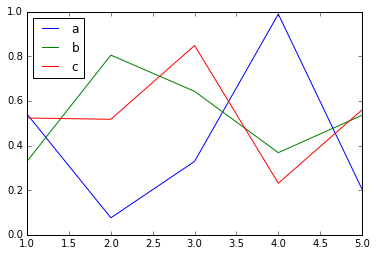

In [87]:
df.plot()

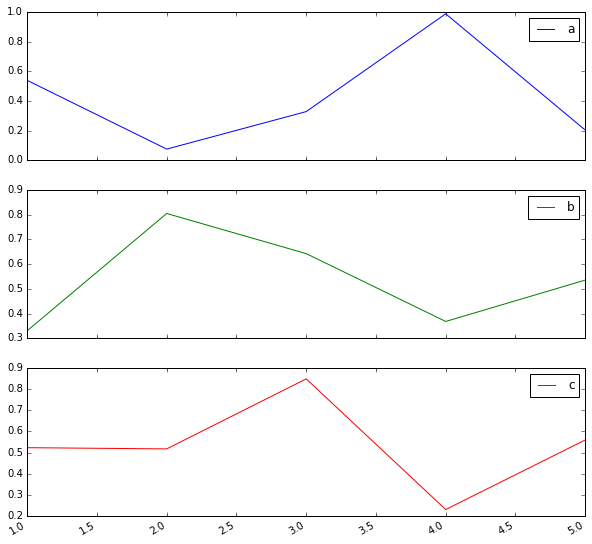

In [88]:
df.plot(subplots=True, figsize=(10,10));

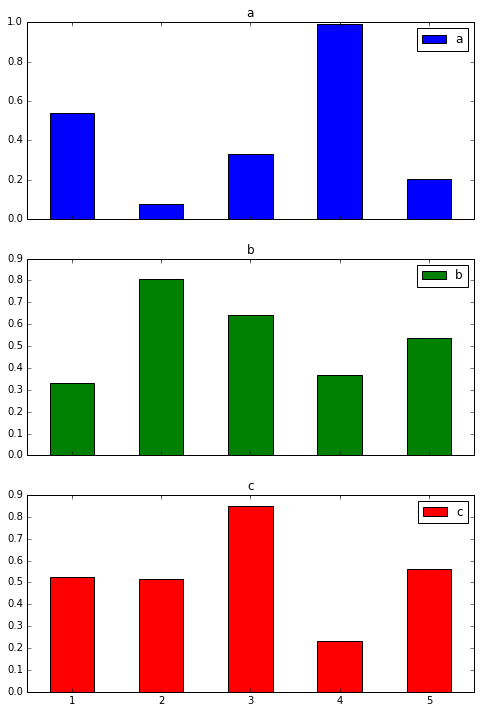

In [90]:
df.plot(figsize=(8,12), \
                          subplots=True, \
                          sharex=True, \
                          kind='bar', rot=0); 

In [91]:
import pandas as pd
from sklearn.datasets import load_iris
 
    
iris = load_iris()
 
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [100]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
iris.to_csv('iris.csv')

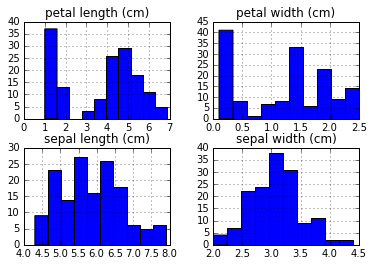

In [95]:
iris.hist(); 

In [96]:
from pandas.tools.plotting import scatter_matrix

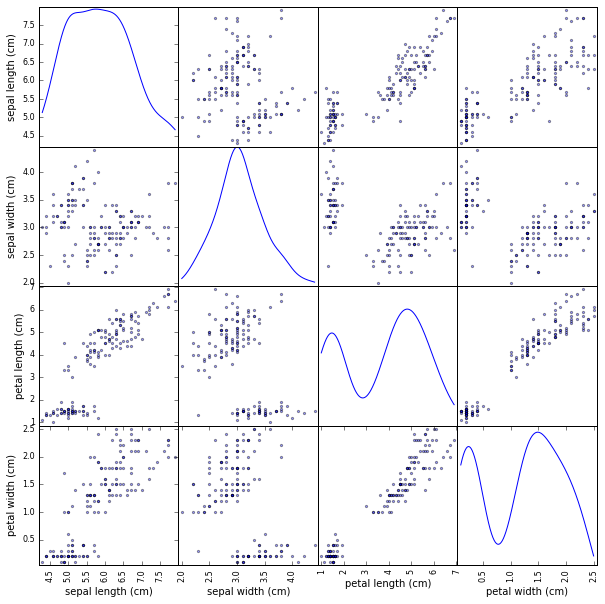

In [97]:
scatter_matrix(iris, alpha=0.4, figsize=(10, 10), diagonal='kde'); 

In [174]:
HTML('<iframe src=http://pandas.pydata.org/pandas-docs/stable/visualization.html width=1000 height=350></iframe>')

### Input and Output in pandas

Pandas has **very powerful IO methods**, allowing to load csv, excel, tab-delimited files very easily. Pandas DataFrames can also be 
saved also in csv, excel files. 

Other supported file types are: 

* JSON (JavaScript Object Notation)
* HDF5 
* HTML (to e.g. read tables contained in HTML documents)
* SQL (Pandas can **query directly from SQL databases** thanks to [SQLAlchemy](http://www.sqlalchemy.org/))
* ...

#### reading from CSV or Excel files

In [178]:
SOI = pd.read_csv('./data/NICO_NIWA_SOI_1941_2010.csv')

In [179]:
SOI.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1876,1.139736,0.963261,0.072242,0.957619,0.793056,1.830828,-0.526367,1.264818,0.985830,-0.776112,-0.341365,-0.382784
1,1877,-0.926413,-0.595044,-0.401848,-0.732915,0.480302,-1.601975,-0.990252,-0.779333,-1.753059,-1.548826,-1.307492,-1.356213
2,1878,-0.832497,-1.900650,-1.455382,-0.659413,0.323924,-0.212507,1.660518,1.328698,1.700323,1.066516,1.397664,1.717772
3,1879,1.280610,1.258075,1.336483,1.251625,0.323924,1.749095,2.256941,2.286894,1.819405,1.482594,0.882396,-0.638950
4,1880,1.092778,0.668446,1.441837,0.590112,1.340376,1.013494,0.202595,1.456458,0.747666,0.472120,0.624762,-0.280318


In [180]:
SOI.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
137,2013,-0.081170,-0.342346,1.073100,0.149103,0.949433,1.503895,0.865287,-0.012776,0.330878,-0.181715,0.817988,-0.024153
138,2014,1.233652,-0.131764,-1.244675,0.884118,0.558490,-0.049040,-0.261290,-1.098731,-0.800402,-0.776112,-1.049859,-0.638950
139,2015,-0.738581,0.036701,-1.033968,-0.218404,-1.239848,-1.111574,-1.454136,-1.929168,-1.812600,-1.964904,-0.598999,-0.997581
140,2016,-1.912530,-1.774301,-0.401848,-1.835437,0.402113,0.686561,0.467671,0.562142,1.283535,-0.419474,-0.148140,0.180780
141,2017,0.153620,-0.215997,0.546333,-0.438909,0.167547,-0.948108,0.865287,0.426853,NaN,NaN,NaN,NaN


In [181]:
SOI = pd.read_csv('./data/NICO_NIWA_SOI_1941_2010.csv', index_col=0)

In [182]:
SOI.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2013,-0.081170,-0.342346,1.073100,0.149103,0.949433,1.503895,0.865287,-0.012776,0.330878,-0.181715,0.817988,-0.024153
2014,1.233652,-0.131764,-1.244675,0.884118,0.558490,-0.049040,-0.261290,-1.098731,-0.800402,-0.776112,-1.049859,-0.638950
2015,-0.738581,0.036701,-1.033968,-0.218404,-1.239848,-1.111574,-1.454136,-1.929168,-1.812600,-1.964904,-0.598999,-0.997581
2016,-1.912530,-1.774301,-0.401848,-1.835437,0.402113,0.686561,0.467671,0.562142,1.283535,-0.419474,-0.148140,0.180780
2017,0.153620,-0.215997,0.546333,-0.438909,0.167547,-0.948108,0.865287,0.426853,NaN,NaN,NaN,NaN


#### Saving in csv, excel etc

In [184]:
recent_SOI = SOI.loc[2013:,:]

In [185]:
recent_SOI.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2013,-0.081170,-0.342346,1.073100,0.149103,0.949433,1.503895,0.865287,-0.012776,0.330878,-0.181715,0.817988,-0.024153
2014,1.233652,-0.131764,-1.244675,0.884118,0.558490,-0.049040,-0.261290,-1.098731,-0.800402,-0.776112,-1.049859,-0.638950
2015,-0.738581,0.036701,-1.033968,-0.218404,-1.239848,-1.111574,-1.454136,-1.929168,-1.812600,-1.964904,-0.598999,-0.997581
2016,-1.912530,-1.774301,-0.401848,-1.835437,0.402113,0.686561,0.467671,0.562142,1.283535,-0.419474,-0.148140,0.180780
2017,0.153620,-0.215997,0.546333,-0.438909,0.167547,-0.948108,0.865287,0.426853,NaN,NaN,NaN,NaN


##### saving to a csv file

In [186]:
recent_SOI.to_csv('./data/recent_SOI.csv')

##### saving to an Excel file

In [189]:
recent_SOI.to_excel('./data/recent_SOI.xlsx', header=False, sheet_name='SOI')

##### if you want to save each year in a different sheet 

In [190]:
writer = pd.ExcelWriter('./data/recent_SOI_sheets.xlsx', engine='xlsxwriter')

In [191]:
for year in range(2013, 2017+1): 
    year_soi = SOI.loc[year,:]
    year_soi.to_excel(writer, sheet_name=str(year))

In [192]:
writer.save()

#### dealing with separators in text files

In [ ]:
HTML('<iframe src=http://www.jamstec.go.jp/frcgc/research/d1/iod/DATA/emi.weekly.txt width=900 height=200></iframe>')

You can use [regular expressions](http://en.wikipedia.org/wiki/Regular_expression) to specify what delimiters to use. 

To know more about regular expressions and their use from Python via the [re](https://docs.python.org/2/library/re.html) package, read: [http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf](http://www.ucs.cam.ac.uk/docs/course-notes/unix-courses/PythonRE/files/PythonRE.pdf)

In [ ]:
data_weekly = pd.read_table('http://www.jamstec.go.jp/frcgc/research/d1/iod/DATA/emi.weekly.txt', \
                            header=None, sep=r'[:, \s*]', parse_dates={'date':[0,1,2]}, engine='python',\
                            index_col='date', usecols=[0,1,2,4])

In [ ]:
data_weekly.columns = ['EMI']

In [ ]:
data_weekly.plot();

### groupby operations in Pandas 

The **groupby** method is a very powerful method of pandas DataFrames, in a nutschell it allows you to

1. **split** your data according to unique values of a variable (or unique *combinations* of *N* variables)

2. **apply** some operation to the groups thus defined, either an *aggregation* or *transformation* method 

3. **combine** the results into a DataFrame

This process is illustrated below, where the operation is here calculating the mean of the groups's values

A very nice explanation of the **groupby** method, with examples, is available from Pandas's documentation at:  

[http://pandas.pydata.org/pandas-docs/stable/groupby.html](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

and a short tutorial on Wes McKinney's blog [here](http://wesmckinney.com/blog/?p=125)

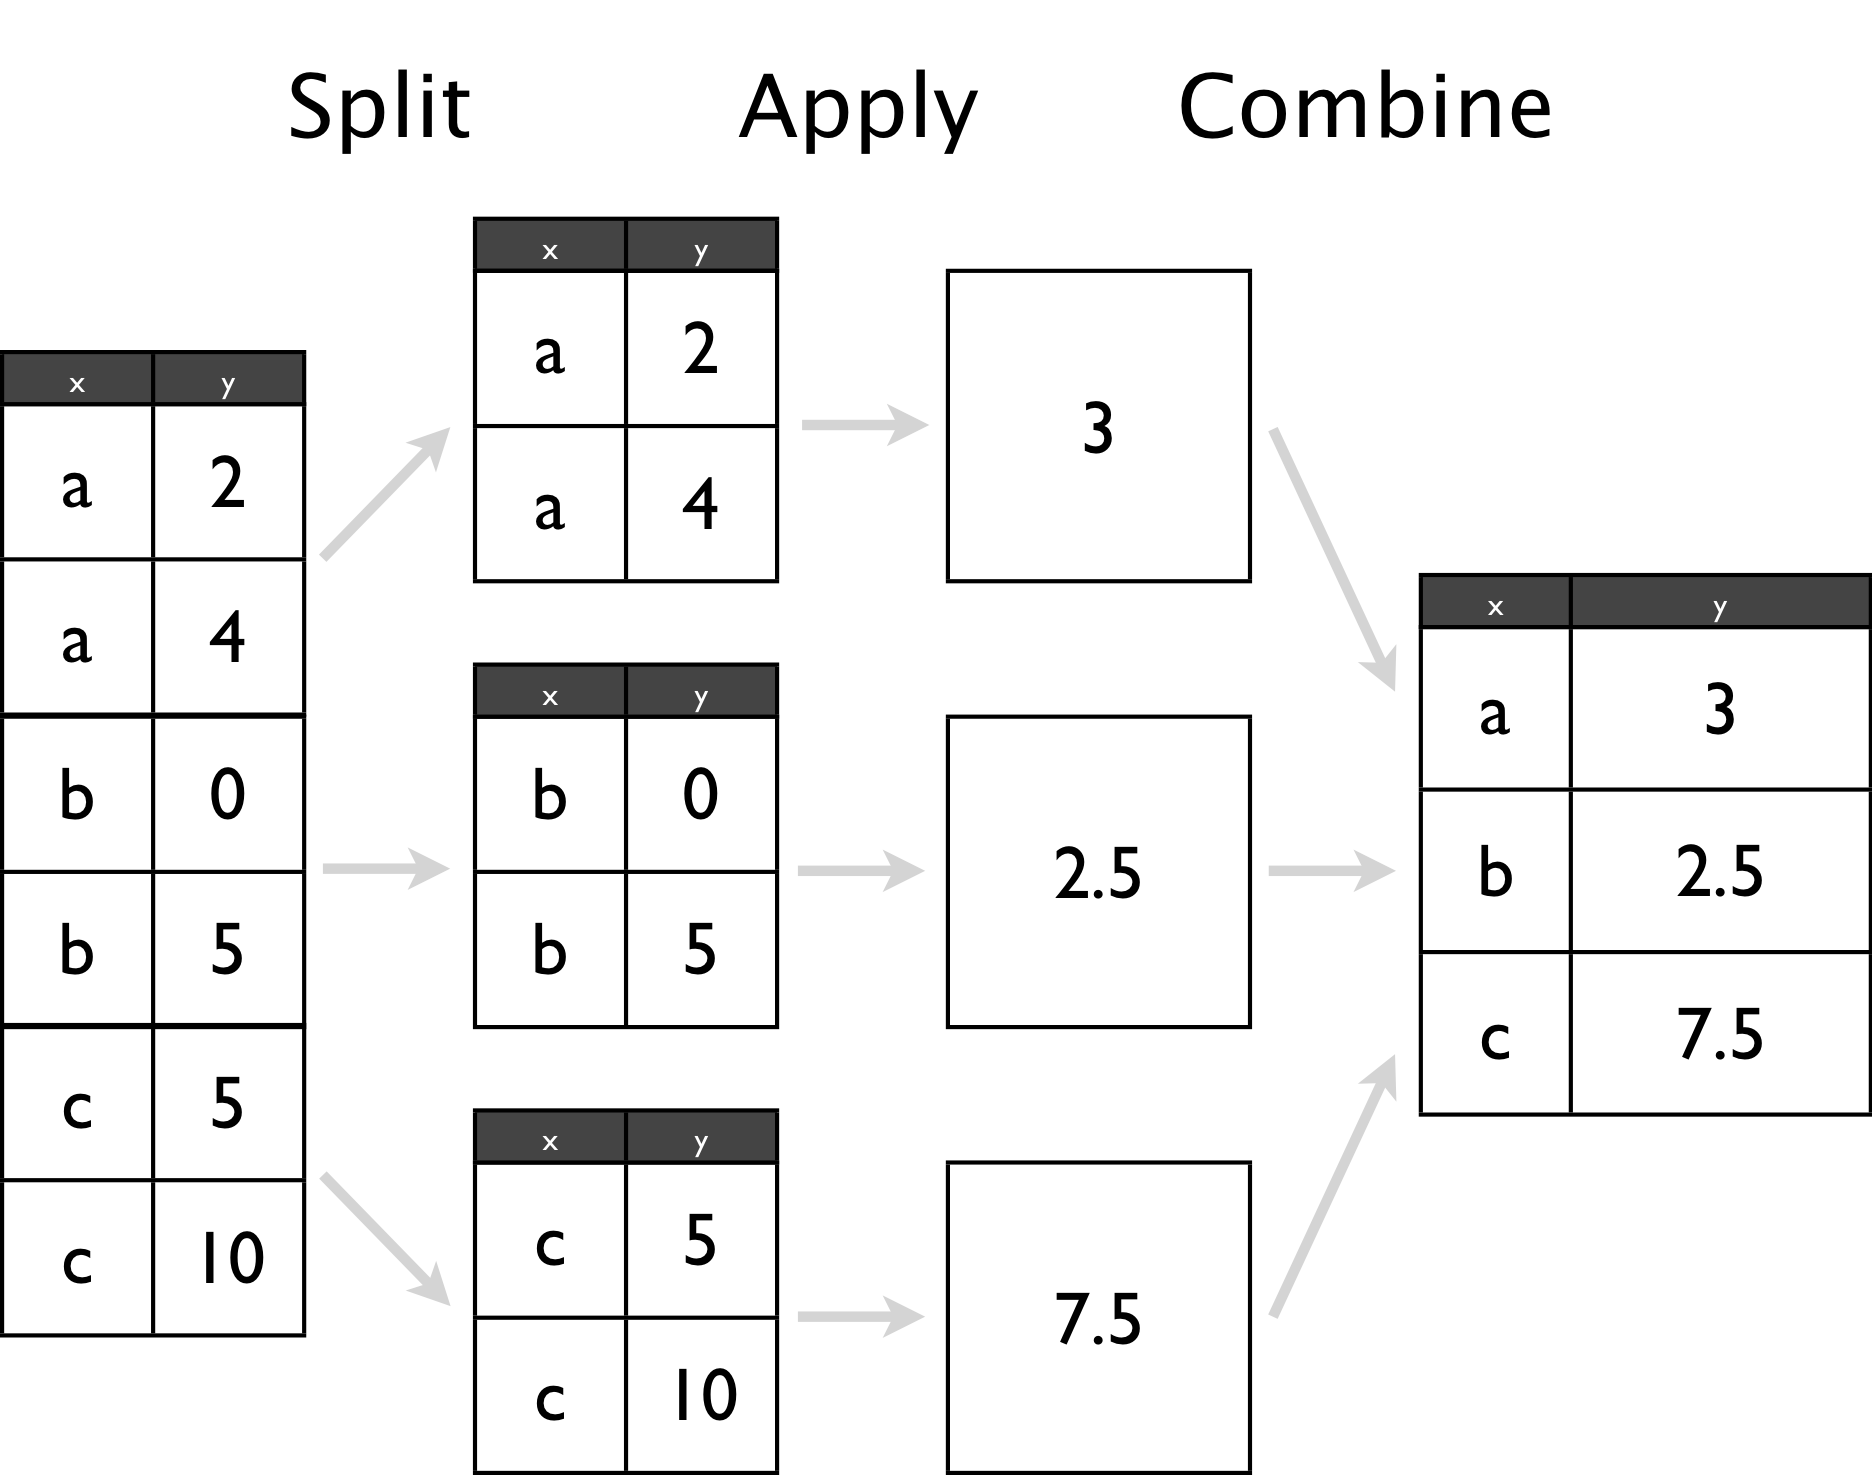

In [114]:
Image(filename='images/split-apply-combine.png', width=800)

In [120]:
url = "ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/ersst3b.nino.mth.81-10.ascii"

In [116]:
#!wget -P ./data ftp://ftp.cpc.ncep.noaa.gov/wd52dg/data/indices/ersst3b.nino.mth.81-10.ascii

In [117]:
data = pd.read_table('../data/ersst3b.nino.mth.81-10.ascii', sep='\s+') #the '\s+' is a regular expression meaning any number of spaces

In [121]:
# if the network confirguration allows it, you can read directly off the URL (ftp):

data = pd.read_table(url, sep='\s+')

In [122]:
data.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
781,2015,2,25.83,-0.28,26.68,0.18,28.95,0.78,27.30,0.47
782,2015,3,26.77,0.27,27.54,0.30,29.11,0.82,27.83,0.51
783,2015,4,26.39,0.78,28.30,0.75,29.64,1.09,28.60,0.81
784,2015,5,25.78,1.37,28.23,0.99,29.75,0.91,28.83,0.91
785,2015,6,25.29,2.22,27.77,1.16,29.76,0.91,28.69,1.00


I only keep the raw - monthly - values of NINO 3.4 

In [123]:
nino = data[['YR','MON','NINO3.4']]

In [125]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.83
1,1950,2,25.20
2,1950,3,26.03
3,1950,4,26.36
4,1950,5,26.19


Now I want to calculate a climatology (over the whole period available)

I first group by UNIQUE values of the variable months, I should get 12 groups

In [126]:
groups = nino.groupby('MON')

In [127]:
for month, group in groups:
    print(month)
    print(group.head())

1
      YR  MON  NINO3.4
0   1950    1    24.83
12  1951    1    25.46
24  1952    1    26.85
36  1953    1    26.85
48  1954    1    27.03
2
      YR  MON  NINO3.4
1   1950    2    25.20
13  1951    2    25.78
25  1952    2    26.79
37  1953    2    27.19
49  1954    2    27.22
3
      YR  MON  NINO3.4
2   1950    3    26.03
14  1951    3    26.72
26  1952    3    27.32
38  1953    3    27.68
50  1954    3    27.21
4
      YR  MON  NINO3.4
3   1950    4    26.36
15  1951    4    27.24
27  1952    4    27.88
39  1953    4    28.19
51  1954    4    26.87
5
      YR  MON  NINO3.4
4   1950    5    26.19
16  1951    5    27.68
28  1952    5    27.99
40  1953    5    28.29
52  1954    5    27.07
6
      YR  MON  NINO3.4
5   1950    6    26.52
17  1951    6    27.46
29  1952    6    27.33
41  1953    6    28.02
53  1954    6    26.93
7
      YR  MON  NINO3.4
6   1950    7    26.42
18  1951    7    27.72
30  1952    7    26.72
42  1953    7    27.52
54  1954    7    26.37
8
      YR  MON  NIN

In [128]:
climatology = groups.mean()

Same as 

    climatology = groups.aggregate(np.mean)
    
    

In [129]:
climatology

,YR,NINO3.4
MON,,
1,1982.5,26.495455
2,1982.5,26.686515
3,1982.5,27.194091
4,1982.5,27.638485
5,1982.5,27.756212
6,1982.5,27.561818
7,1982.0,27.152000
8,1982.0,26.765385
9,1982.0,26.672462


In [131]:
climatology['NINO3.4']

MON
1     26.495455
2     26.686515
3     27.194091
4     27.638485
5     27.756212
6     27.561818
7     27.152000
8     26.765385
9     26.672462
10    26.642000
11    26.608615
12    26.541692
Name: NINO3.4, dtype: float64

In [133]:
type(climatology)

pandas.core.frame.DataFrame

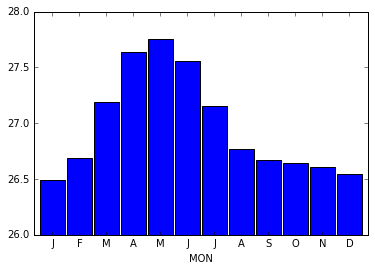

In [132]:
f, ax = plt.subplots()

climatology['NINO3.4'].plot(ax=ax, kind='bar',ylim=[26,28], rot=0, width=0.9)

ax.set_xticklabels(list('JFMAMJJASOND'));

f.savefig('./climatology.pdf')

In [135]:
nino.groupby('MON')[['NINO3.4']].mean()

,NINO3.4
MON,
1,26.495455
2,26.686515
3,27.194091
4,27.638485
5,27.756212
6,27.561818
7,27.152000
8,26.765385
9,26.672462


Now suppose we want to apply a function that doesnt **aggregate** the values in the groups (such as *sum*, or *mean*) but rather want to **apply a function** to those values ... 

An example would be calculating the standardized anomalies per month (to each value subtract the mean of the corresponding month, then divide by the standard-deviation)

In [136]:
def zscore(x): 
    z = (x - x.mean()) / x.std()
    return z

In [137]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.83
1,1950,2,25.20
2,1950,3,26.03
3,1950,4,26.36
4,1950,5,26.19


In [138]:
transformed = nino.groupby('MON').apply(zscore)

In [139]:
transformed

,YR,MON,NINO3.4
0,-1.693030,NaN,-1.547440
1,-1.693030,NaN,-1.683959
2,-1.693030,NaN,-1.724714
3,-1.693030,NaN,-2.160946
4,-1.693030,NaN,-2.601654
5,-1.693030,NaN,-1.722703
6,-1.692435,NaN,-1.131814
7,-1.692435,NaN,-1.072378
8,-1.692435,NaN,-1.090066
9,-1.692435,NaN,-0.707565


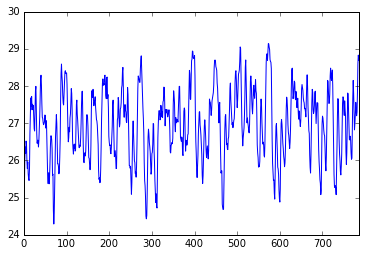

In [141]:
nino['NINO3.4'].plot()

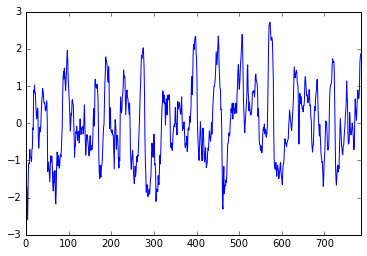

In [140]:
transformed['NINO3.4'].plot()

Now we want calculate (just) the anomalies WRT to the climatology, but with a ** *normal* established over 1981 - 2010**

In [142]:
nino.head()

,YR,MON,NINO3.4
0,1950,1,24.83
1,1950,2,25.20
2,1950,3,26.03
3,1950,4,26.36
4,1950,5,26.19


we can make use of the *query* method of Pandas DataFrames to select the climatological period

In [143]:
nino.query('YR >= 1981 & YR <= 2010').head()

,YR,MON,NINO3.4
372,1981,1,26.17
373,1981,2,26.13
374,1981,3,26.75
375,1981,4,27.32
376,1981,5,27.41


In [144]:
def demean(x): 
    z = x - x.query('YR >= 1981 & YR <= 2010').mean()
    return z

In [147]:
anoms = nino.groupby('MON').apply(demean)

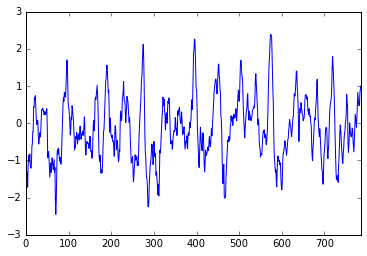

In [149]:
data['ANOM.3'].plot() # Should be the same

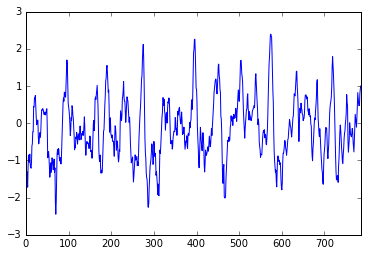

In [150]:
anoms['NINO3.4'].plot()


#### Exercise

The file **Daily_clim_data_Auckland.csv** in the `data` directory (`./data/Daily_clim_data_Auckland.csv`) contains 
daily values for rainfall, minimum and maximum temperatures for Auckland from 1972 to now.  

1. Read the data in a Pandas DataFrame, correctly setting up the index as a datetime index 
2. calculate monthly means for the temperature data, monthly totals for rainfall 
3. calculate and plot a climatology over the period 1981 - 2000 for all parameters 
4. calculate the anomalies WRT this climatology for all parameters 
5. plots the time-series of minimum and maximum temperature 
6. dig into the Scipy documentation to find how to calculate the linear trend over the period for the temperature data 
7. calculate and plot the trend 

### Series with a date / datetime index (timeseries)

Series can have indexes representing dates / times 

In [167]:
a

b   -0.465730
c    0.241962
d   -1.913280
e   -1.724918
Name: my series, dtype: float64

In [168]:
a.index = pd.date_range(start='2014-1-1', periods=len(a)) # default 'period' is daily

Below are the codes for the frequencies that Pandas supports, note that you can specify an integer multiple of a frequency: i.e. `2D` means 2 days 

<div style='float: center'>
  <img style='width: 400px' src="./images/pandas_freqs.png"></img>
</div>

In [169]:
a.head()

2014-01-01   -0.465730
2014-01-02    0.241962
2014-01-03   -1.913280
2014-01-04   -1.724918
Freq: D, Name: my series, dtype: float64

In [170]:
a.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'], dtype='datetime64[ns]', freq='D')

In [171]:
### but you can convert it to an numpy array of python datetime objects if you want
py_datetimes = a.index.to_pydatetime()

In [172]:
py_datetimes

array([datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2014, 1, 2, 0, 0),
       datetime.datetime(2014, 1, 3, 0, 0),
       datetime.datetime(2014, 1, 4, 0, 0)], dtype=object)

And a number of useful methods for manipulation of time series is exposed

In [50]:
a

2014-01-01   -0.824366
2014-01-02   -0.209424
2014-01-03    0.619141
2014-01-04    1.925206
2014-01-05   -0.341126
Freq: D, Name: my series, dtype: float64

In [ ]:
### the ```shift``` method makes it easy e.g. to compare series with lead / lags 
a.shift(periods=-1)

In [56]:
a

2014-01-01   -0.824366
2014-01-02   -0.209424
2014-01-03    0.619141
2014-01-04    1.925206
2014-01-05   -0.341126
Freq: D, Name: my series, dtype: float64

In [57]:
### and the ```truncate`` method allows easy selection of time-slices
a.truncate(before='2014-1-2', after='2014-1-4')

2014-01-02   -0.209424
2014-01-03    0.619141
2014-01-04    1.925206
Freq: D, Name: my series, dtype: float64

#### correctly parsing date(times) when date and time information are contained in different columns

In [208]:
!open ./data/ISO_datetime.xls

In [209]:
data = pd.read_excel('./data/ISO_datetime.xls', sheetname='Sheet1')

In [210]:
data.head()

,date,value
0,2014-01-02,0.786299
1,2014-01-03,0.354398
2,2014-01-04,0.747329
3,2014-01-05,0.461564
4,2014-01-06,0.626105


In [211]:
data['date']

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
Name: date, dtype: datetime64[ns]

In [212]:
data = pd.read_excel('./data/ISO_datetime.xls', sheetname='Sheet1', index_col=0)

In [213]:
data.head()

,value
date,
2014-01-02,0.786299
2014-01-03,0.354398
2014-01-04,0.747329
2014-01-05,0.461564
2014-01-06,0.626105


In [215]:
data.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11'],
              dtype='datetime64[ns]', name='date', freq=None)

when the year, month and day are contained in different columns

In [224]:
!open ./data/year_month_day.xlsx

In [221]:
ymd = pd.read_excel('./data/year_month_day.xlsx', sheetname='Sheet1')

In [222]:
ymd.head()

,year,month,day,value
0,2014,1,2,0.786299
1,2014,1,3,0.354398
2,2014,1,4,0.747329
3,2014,1,5,0.461564
4,2014,1,6,0.626105


In [223]:
pd.to_datetime(ymd.loc[:,['year','month','day']])

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
dtype: datetime64[ns]

In [225]:
ymd.index = pd.to_datetime(ymd.loc[:,['year','month','day']])

In [226]:
ymd

,year,month,day,value
2014-01-02,2014,1,2,0.786299
2014-01-03,2014,1,3,0.354398
2014-01-04,2014,1,4,0.747329
2014-01-05,2014,1,5,0.461564
2014-01-06,2014,1,6,0.626105
2014-01-07,2014,1,7,0.528142
2014-01-08,2014,1,8,0.091771
2014-01-09,2014,1,9,0.807198
2014-01-10,2014,1,10,0.402332
2014-01-11,2014,1,11,0.281455


In [227]:
myd = pd.read_excel('./data/year_month_day.xlsx', sheetname='Sheet2'); myd.head()

,month,year,day,value
0,1,2014,2,0.478467
1,1,2014,3,0.833801
2,1,2014,4,0.837646
3,1,2014,5,0.453646
4,1,2014,6,0.260355


In [228]:
pd.to_datetime(myd.loc[:,['year','month','day']])

0   2014-01-02
1   2014-01-03
2   2014-01-04
3   2014-01-05
4   2014-01-06
5   2014-01-07
6   2014-01-08
7   2014-01-09
8   2014-01-10
9   2014-01-11
dtype: datetime64[ns]

In [ ]:
myd.index = pd.to_datetime(myd.loc[:,['year','month','day']])

another way to do it, might come handy when column names are NOT `year`,`month`,`day`

In [ ]:
myd.index = myd[['year', 'month', 'day']].apply(lambda d: datetime(*d), axis = 1)

In [ ]:
myd.head()

#### dealing with missing values -- and missing dates -- in Pandas

read some daily data from CLIFLO (thanks Petra)

In [ ]:
# !open ./data/Wellington_rain.xlsx

The Excel file has a header and a footer, we need to get rid of the first 8 and last 8 lines 

In [20]:
data = pd.read_excel('./data/Wellington_rain.xlsx',skiprows=8, skip_footer=8)

In [21]:
data.head()

,Station,Date(NZST),Time(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,"Wellington, Kelburn 2",1995-01-15,08:00:00,0.0,-,-,-,24,D
1,"Wellington, Kelburn 2",1995-01-16,08:00:00,0.0,-,-,-,24,D
2,"Wellington, Kelburn 2",1995-01-17,08:00:00,0.0,-,-,-,24,D
3,"Wellington, Kelburn 2",1995-01-18,08:00:00,0.0,-,-,-,24,D
4,"Wellington, Kelburn 2",1995-01-19,08:00:00,7.2,-,-,-,24,D


In [22]:
data.tail()

,Station,Date(NZST),Time(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
6732,"Wellington, Kelburn 2",2017-08-11,09:00:00,1.4,-,0,0.3,24,D
6733,"Wellington, Kelburn 2",2017-08-12,09:00:00,0.0,-,1.1,0,24,D
6734,"Wellington, Kelburn 2",2017-08-13,09:00:00,0.0,-,2.1,0,24,D
6735,"Wellington, Kelburn 2",2017-08-14,09:00:00,24.2,-,0,21,24,D
6736,"Wellington, Kelburn 2",2017-08-15,09:00:00,13.8,-,0,12.7,24,D


In [23]:
data.index = data.loc[:,'Date(NZST)']

In [25]:
data = data.loc[:,['Amount(mm)']]

In [28]:
%matplotlib inline

In [30]:
data = data.sort_index()

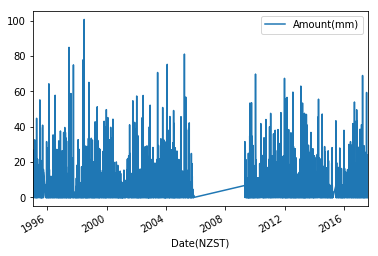

In [31]:
data.plot()

In [32]:
data.index[0]

Timestamp('1995-01-15 00:00:00')

In [33]:
data.index[-1]

Timestamp('2017-08-15 00:00:00')

In [34]:
len(data)

6737

In [36]:
dates = pd.date_range(start=data.index[0], end=data.index[-1], freq='D')

In [37]:
len(dates)

8249

In [39]:
data_reindexed = data.reindex(dates)

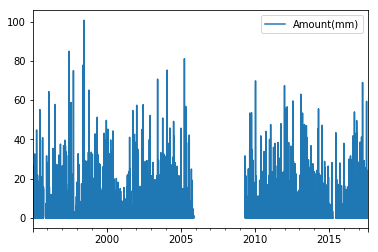

In [40]:
data_reindexed.plot()

In [47]:
data_reindexed = data_reindexed.loc['2014':,:]

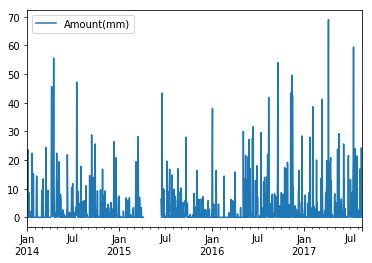

In [48]:
data_reindexed.plot()

In [49]:
any(pd.isnull(data_reindexed))

True

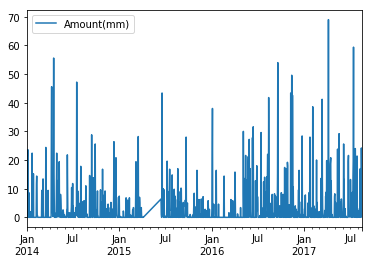

In [50]:
data_reindexed.interpolate().plot()

#### Another example: UP-sampling and linear interpolation 

MSLP at Ouloup station (Ouvea): 1 hour interval, but need to be on 15 minutes interval, with linear interpolation

In [195]:
data = pd.read_csv('./data/OULOUP_PMER.csv', index_col=0, parse_dates=True)

In [196]:
data.head()

,POSTE,PMER
2017-02-01 00:00:00,98820001,1012.3
2017-02-01 01:00:00,98820001,1011.7
2017-02-01 02:00:00,98820001,1011.1
2017-02-01 03:00:00,98820001,1011.0
2017-02-01 04:00:00,98820001,1011.1


In [197]:
data = data.loc[:,['PMER']]

In [198]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


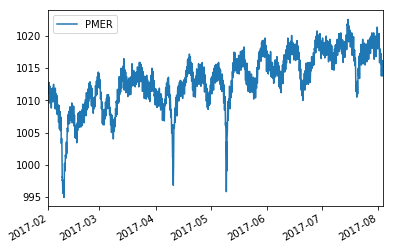

In [199]:
data.plot()

In [200]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


In [201]:
data.resample?

In [202]:
upsampled = data.resample('15min')

In [203]:
upsampled.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 00:15:00,NaN
2017-02-01 00:30:00,NaN
2017-02-01 00:45:00,NaN
2017-02-01 01:00:00,1011.7


In [204]:
upsampled = upsampled.interpolate(method='linear')

In [205]:
upsampled.head()

,PMER
2017-02-01 00:00:00,1012.30
2017-02-01 00:15:00,1012.15
2017-02-01 00:30:00,1012.00
2017-02-01 00:45:00,1011.85
2017-02-01 01:00:00,1011.70


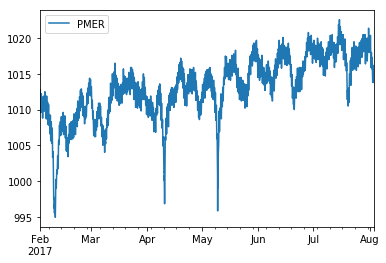

In [206]:
upsampled.plot()

#### downsampling: going from higher to lower frequency

In [80]:
data.head()

,PMER
2017-02-01 00:00:00,1012.3
2017-02-01 01:00:00,1011.7
2017-02-01 02:00:00,1011.1
2017-02-01 03:00:00,1011.0
2017-02-01 04:00:00,1011.1


In [85]:
downsampled = data.resample('1D').mean()

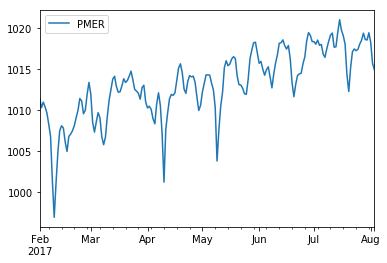

In [86]:
downsampled.plot()

#### rolling window operations 

In [89]:
rmean3days = downsampled.rolling(3, min_periods=3).mean()

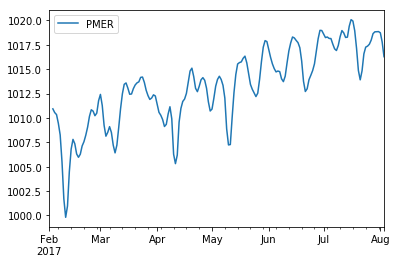

In [90]:
rmean3days.plot()

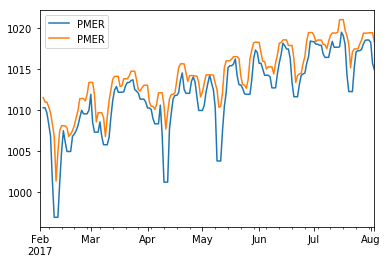

In [104]:
f, ax = plt.subplots()
downsampled.rolling(3, min_periods=3).min().plot(ax=ax)
downsampled.rolling(3, min_periods=3).max().plot(ax=ax)

#### you can define your OWN function and pass it to the rolling dataframe object, using the `apply` method

In [100]:
def maxmin(x):
    return x.max() - x.min()

In [107]:
maxmin_data = downsampled.rolling(3, min_periods=3).apply(maxmin)

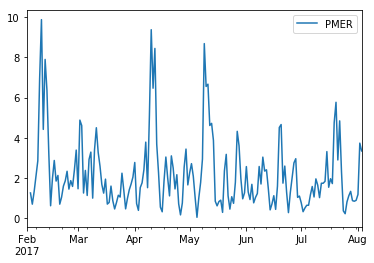

In [108]:
maxmin_data.plot()